In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('darkgrid')
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 100)

In [2]:
os.chdir('Data')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Table of Contents

1. [Data Preprocessing & Cleaning](#Data_Cleaning)
2. [Exploratory Data Analysis](#EDA)
3. [Feature Engineering](#Feature_Engineering)

## 1. Data Preprocessing & Cleaning
<a id='Data_Cleaning'></a>

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
def initial_data_summary(dataset):
    print('Data samples: {}'.format(dataset.shape[0]))
    print('Data features: {}'.format(dataset.shape[1]))
    print('\n')
    
    print('Percentage of NaNs:')
    print(100 * dataset.isna().sum() / len(dataset))
    print('\n')
    
    int64 = 0
    float64 = 0
    object_count = 0
    print('Feature Data Type Count:')
    for value in list(train.dtypes):
        if value == 'int64':
            int64 += 1
        elif value == 'float64':
            float64 += 1
        elif value == 'object':
            object_count += 1
    print('int64: {} \nfloat64: {} \nobject_count: {}'.format(int64, float64, object_count))
    print('\n')
    
    print(dataset.describe())

In [6]:
initial_data_summary(train) 

Data samples: 1460
Data features: 81


Percentage of NaNs:
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000

In [7]:
initial_data_summary(test)

Data samples: 1459
Data features: 80


Percentage of NaNs:
Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinSF1        0.068

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
def clean_data(dataset):
    dataset.dropna(subset=['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd',
                          'BsmtQual', 'BsmtCond', 'Electrical', 'KitchenQual',
                          'Functional', 'GarageCars', 'GarageArea', 'SaleType'], axis=0, inplace=True)
    
    dataset['LotFrontage'].fillna(0, axis=0, inplace=True)
    dataset['Alley'].fillna('No Alley', inplace=True)
    dataset['MasVnrType'].fillna('Unknown', inplace=True)
    dataset['MasVnrArea'].fillna(0, inplace=True)
    dataset['BsmtExposure'].fillna('Not Applicable', inplace=True)
    dataset.BsmtFinType1.fillna('No Basement', inplace=True)
    dataset.BsmtFinType2.fillna('No Basement', inplace=True)
    dataset.FireplaceQu.fillna('No Fireplace', inplace=True)
    dataset.GarageType.fillna('No Garage', inplace=True)
    dataset.GarageFinish.fillna('No Garage', inplace=True)
    dataset.GarageQual.fillna('No Garage', inplace=True)
    dataset.GarageCond.fillna('No Garage', inplace=True)
    dataset.PoolQC.fillna('No Pool', inplace=True)
    dataset.Fence.fillna('No Fence', inplace=True)
    dataset.MiscFeature.fillna('No Addtl Featrue', inplace=True)
    
    dataset.drop('GarageYrBlt', axis=1, inplace=True)
    
    return dataset

In [11]:
clean_data(train)
clean_data(test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No Fireplace,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No Pool,MnPrv,No Addtl Featrue,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No Fireplace,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No Pool,MnPrv,No Addtl Featrue,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No Pool,No Fence,No Addtl Featrue,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,No Alley,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No Pool,No Fence,No Addtl Featrue,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,No Fireplace,No Garage,No Garage,0.0,0.0,No Garage,No Garage,Y,0,0,0,0,0,0,No Pool,No Fence,No Addtl Featrue,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,No Fireplace,CarPort,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,No Pool,No Fence,No Addtl Featrue,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,Unf,2.0,576.0

## 2. EDA Visualizations
<a id='EDA'></a>

In [12]:
def plot_function(data, plot_type=None, x=None, y=None, color='red', bins=10, kde=True, hue=None, alpha=0.5, size=4,
                  palette='coolwarm', title=None, figsize=None, axv_mean_line=False, axv_median_line=False,
                 legend=False):

    plt.figure(figsize=figsize)
    if plot_type.lower() == 'bar':
        sns.barplot(x=x, y=y, data=data, hue=hue)
    elif plot_type.lower() == 'line':
        sns.lineplot(x=x, y=y, data=data, hue=hue)
    elif plot_type.lower() == 'hist':
        sns.distplot(data, bins=bins, kde=kde, color=color)
    elif plot_type.lower() == 'count':
        sns.countplot(x=x, data=data, hue=hue)
    elif plot_type.lower() == 'scatter':
        sns.scatterplot(x=x, y=y, data=data, hue=hue, size=size, alpha=alpha, color=color)
    elif plot_type.lower() == 'box':
        sns.boxplot(x=x, data=data, hue=hue, color=color)
    elif plot_type.lower() == 'strip':
        sns.stripplot(x=x, y=y, data=data, hue=hue, palette=palette, size=size, alpha=alpha)
        
    if axv_mean_line == True:
        plt.axvline(data.mean(), color='green', label='Mean')
        
    if axv_median_line == True:
        plt.axvline(data.median(), color='black', ls='--', label='Median')
    
    plt.title(title)
    
    if legend == True:
        plt.legend()
    
    plt.show()

In [13]:
def CDF_plot(data, x_label, figsize=(10, 5), title=None):
    sorted_data = np.sort(data)
    cdf_data = np.arange(1, len(sorted_data) +1)/ len(sorted_data + 1)
    
    plt.figure(figsize=figsize)
    plt.plot(sorted_data, cdf_data)
    plt.xlabel(x_label)
    plt.ylabel('CDF')
    plt.title(title)
    plt.show()

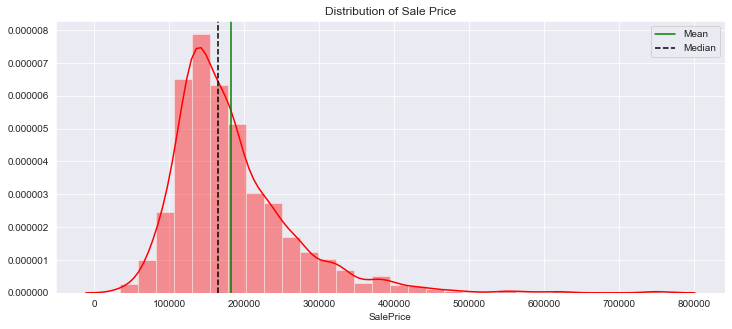

In [14]:
# Plotting the distribution of Price
plot_function(train['SalePrice'], plot_type='Hist', bins=30, title='Distribution of Sale Price',
             figsize=(12, 5), axv_mean_line=True, axv_median_line=True, legend=True)

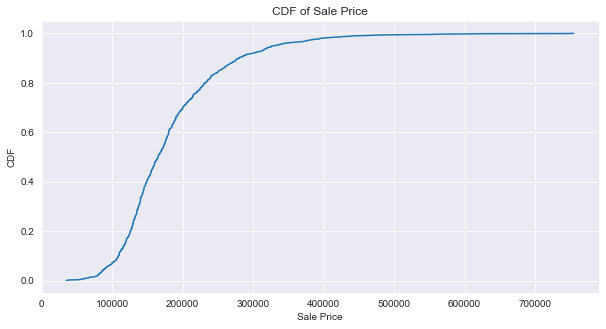

In [15]:
CDF_plot(train['SalePrice'], x_label='Sale Price', title='CDF of Sale Price')

It looks like the price distribution is log normal. To test this out, I will plot a distribution of the log of Sale Price.

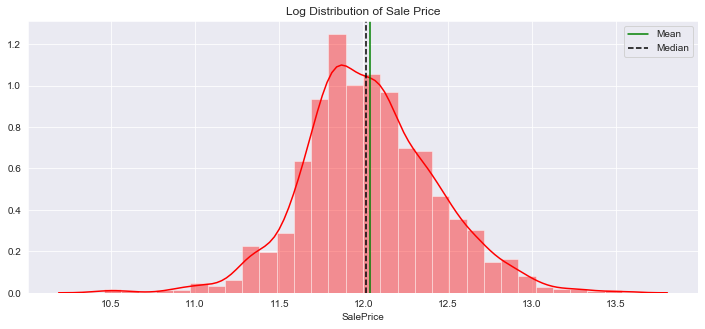

In [16]:
plot_function(np.log(train['SalePrice']), plot_type='Hist', bins=30, title='Log Distribution of Sale Price',
             figsize=(12, 5), axv_mean_line=True, axv_median_line=True, legend=True)

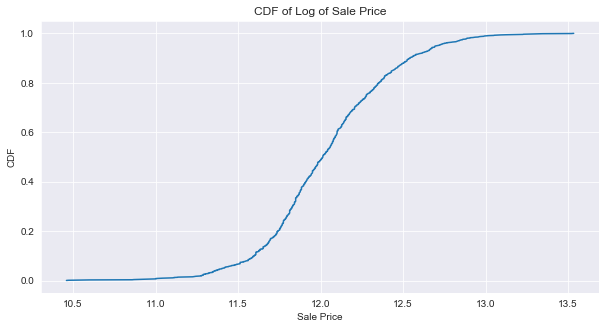

In [17]:
CDF_plot(np.log(train['SalePrice']), x_label='Sale Price', title='CDF of Log of Sale Price')

In [18]:
sale_price_pearson_correlations = train.iloc[:, 1:].corr()['SalePrice'].reset_index().\
rename(columns={'index': 'Feature'})
sale_price_pearson_correlations.sort_values('SalePrice', ascending=False)[1:11]

,Feature,SalePrice
3,OverallQual,0.787985
15,GrLivArea,0.709303
24,GarageCars,0.643039
25,GarageArea,0.622604
12,1stFlrSF,0.613887
11,TotalBsmtSF,0.610085
18,FullBath,0.573755
22,TotRmsAbvGrd,0.542785
5,YearBuilt,0.519014
6,YearRemodAdd,0.500512


In [19]:
sale_price_spearman_correlations = train.iloc[:, 1:].corr(method='spearman')['SalePrice'].reset_index().\
rename(columns={'index': 'Feature'})
sale_price_spearman_correlations.sort_values('SalePrice', ascending=False)[1:11]

,Feature,SalePrice
3,OverallQual,0.804618
15,GrLivArea,0.735889
24,GarageCars,0.698107
18,FullBath,0.657473
25,GarageArea,0.650624
5,YearBuilt,0.650053
12,1stFlrSF,0.590939
11,TotalBsmtSF,0.583937
6,YearRemodAdd,0.567637
22,TotRmsAbvGrd,0.545107


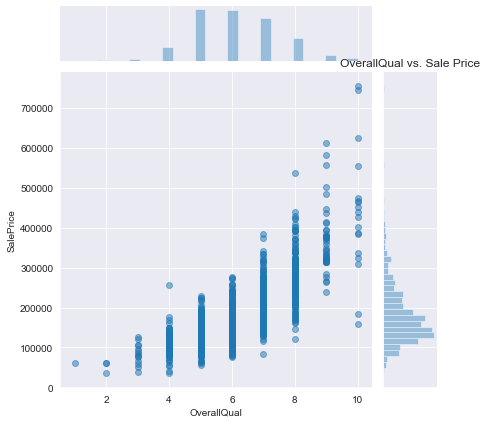

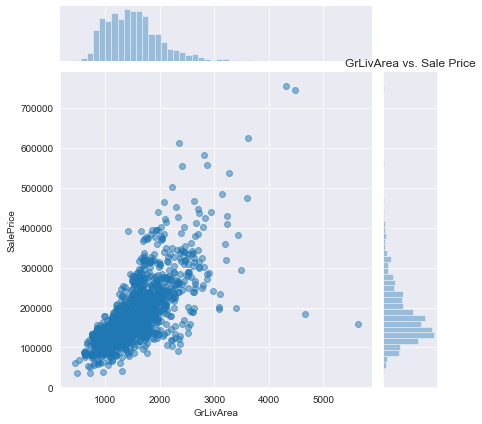

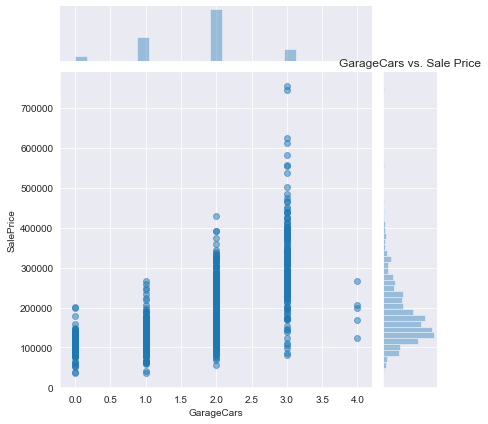

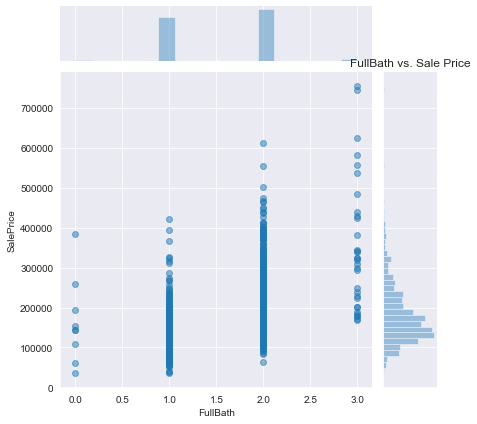

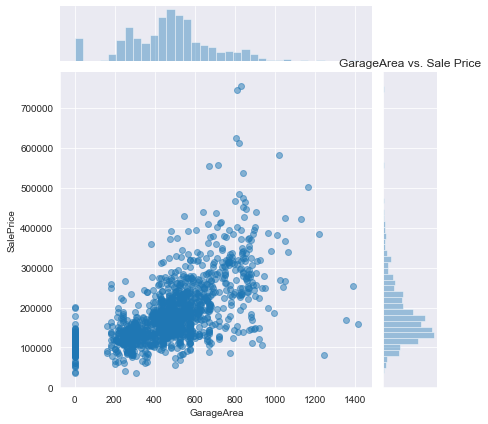

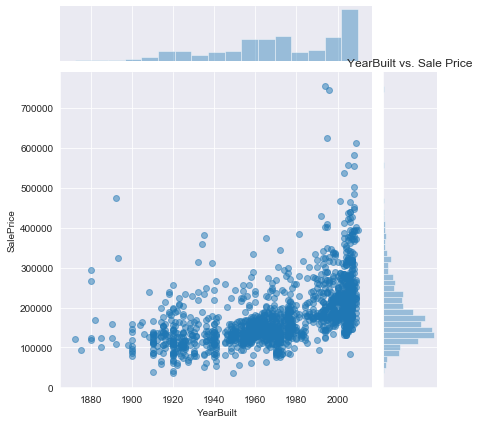

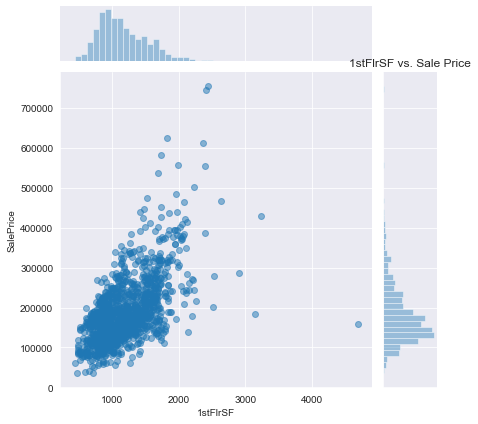

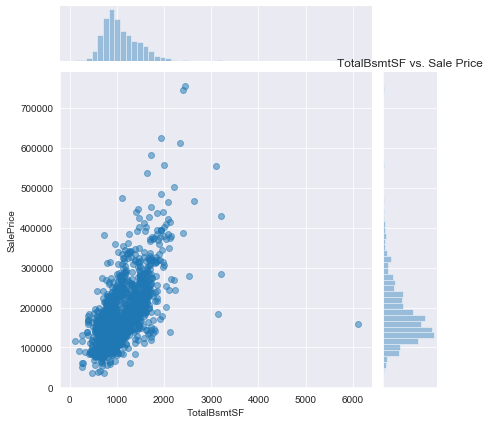

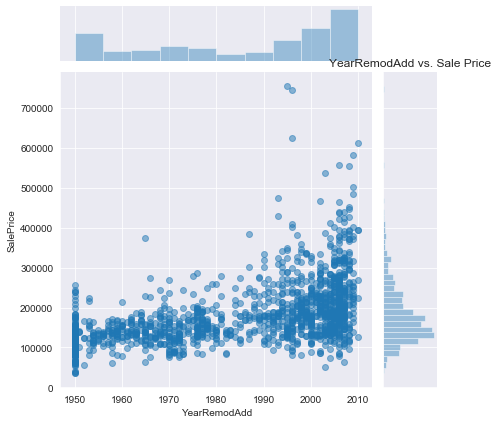

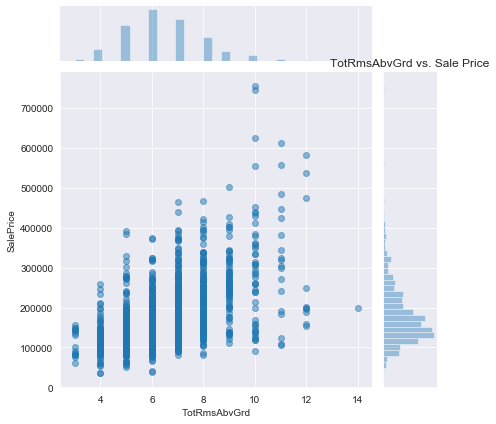

In [20]:
for feature in sale_price_spearman_correlations.sort_values('SalePrice', ascending=False)[1:11]['Feature']:
    sns.jointplot(x=feature, y='SalePrice', data=train, alpha=0.5)
    plt.title(feature + ' vs. Sale Price')
    plt.show()

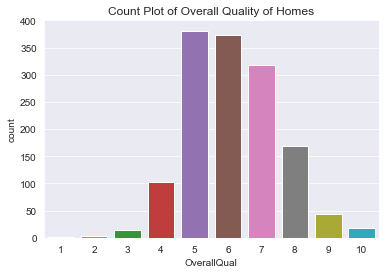

In [21]:
plot_function(data=train, x='OverallQual', plot_type='Count', title='Count Plot of Overall Quality of Homes')

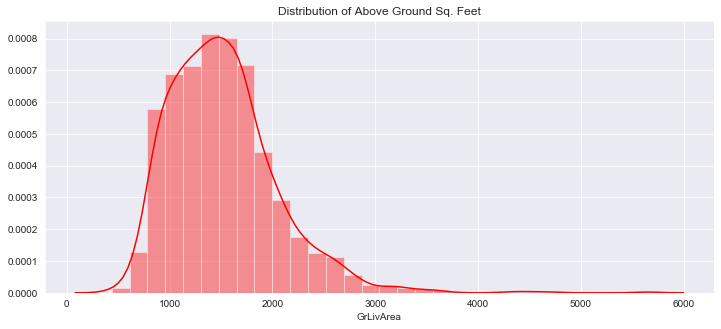

In [22]:
plot_function(train['GrLivArea'], plot_type='Hist', title='Distribution of Above Ground Sq. Feet', bins=30,
             figsize=(12, 5))

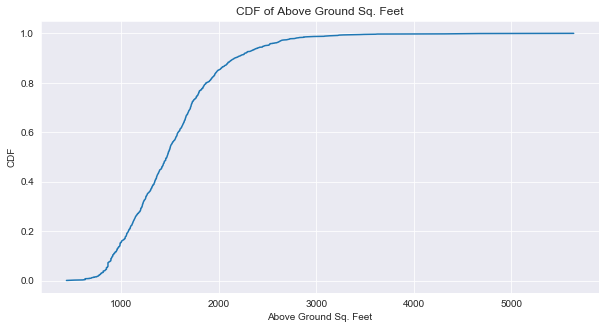

In [23]:
CDF_plot(train['GrLivArea'], x_label='Above Ground Sq. Feet', title='CDF of Above Ground Sq. Feet')

Above Ground Square footage also looks to be log normally distributed.

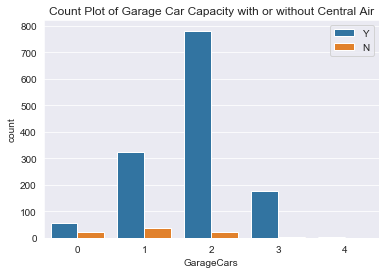

In [24]:
plot_function(data=train, x='GarageCars', plot_type='Count', 
              title='Count Plot of Garage Car Capacity with or without Central Air',
             hue='CentralAir', legend=True)

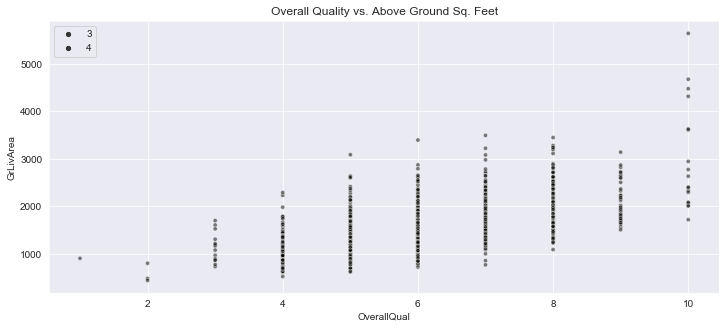

In [25]:
plot_function(data=train, x='OverallQual', y='GrLivArea', plot_type='Scatter', 
              title='Overall Quality vs. Above Ground Sq. Feet', figsize=(12, 5), color='black', legend=False)

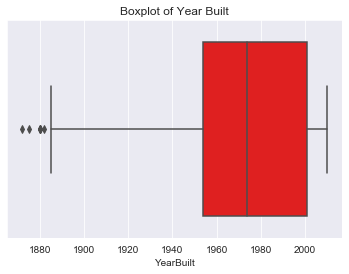

In [26]:
plot_function(x='YearBuilt', data=train, y='GarageCars', plot_type='Box',
              title='Boxplot of Year Built')

## 3. Feature Engineering
<a id='Feature_Engineering'></a>

The goal is to convert all ordinal categorical values to numbers in order, and then convert nominal categorical values to dummy variables.

In [27]:
def convert_categories_to_numbers(dataset):
    object_columns = np.where((dataset.dtypes != np.float) & (dataset.dtypes != np.int))[0]
    object_columns = dataset.iloc[:, object_columns].columns
    
    for column in object_columns:
        if column in ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']:
            dataset[column] = dataset[column].map({'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
        elif column in ['BsmtQual', 'BsmtCond']:
            dataset[column] = dataset[column].map({'Na': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
        elif column == 'BsmtExposure' :
            dataset[column] = dataset[column].map({'Not Applicable': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
        elif column in ['BsmtFinType1', 'BsmtFinType2']:
            dataset[column] = dataset[column].map({'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4,
                                                   'ALQ': 5, 'GLQ': 6})
        elif column == 'Functional':
            dataset[column] = dataset[column].map({'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5,
                                                   'Min1': 6, 'Typ': 7})
        elif column == 'FireplaceQu':
            dataset[column] = dataset[column].map({'No Fireplace': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
        elif column == 'GarageFinish':
            dataset[column] = dataset[column].map({'No Garage': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
        elif column in ['GarageQual', 'GarageCond']:
            dataset[column] = dataset[column].map({'No Garage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5})
        elif column == 'PavedDrive':
            dataset[column] = dataset[column].map({'N': 0, 'P': 1, 'Y': 2})
        elif column == 'PoolQC':
            dataset[column] = dataset[column].map({'No Pool': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
        elif column == 'Fence':
            dataset[column] = dataset[column].map({'No Fence': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})
            
        else:
            dataset = pd.get_dummies(dataset, columns=[column], dtype=int)
        
    return dataset

In [28]:
train = convert_categories_to_numbers(train)
test = convert_categories_to_numbers(test)

In [29]:
train.to_csv('train_cleaned.csv')
test.to_csv('test_cleaned.csv')